Rawan Abdellah 
--------


In [24]:
import sqlite3 as lite
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
con = lite.connect('lahman2014.sqlite')


Part 1 | Question 1
-----------------------------------------------

In [19]:
#geting the columns using sql queries
salary_total = "SELECT teamID,yearID, SUM(salary) As totalSalaries from Salaries group by teamID, yearID ORDER BY teamID"

wins_total = "SELECT teamID,yearID,W AS wins,G As games from Teams group by teamID, yearID ORDER BY teamID"

salary_df = pd.read_sql(salary_total, con)

wins_df = pd.read_sql(wins_total, con)
#calculate the winning Percantage
wins_df['winningPercantage'] = wins_df['wins'] / wins_df['games'] * 100


In [20]:
team_df = salary_df.merge(wins_df, how ="inner",left_on=["yearID", "teamID"],right_on=["yearID", "teamID"])
team_df

,teamID,yearID,totalSalaries,wins,games,winningPercantage
0,ANA,1997,31135472.0,84,162,51.851852
1,ANA,1998,41281000.0,85,162,52.469136
2,ANA,1999,55388166.0,70,162,43.209877
3,ANA,2000,51464167.0,82,162,50.617284
4,ANA,2001,47535167.0,75,162,46.296296
...,...,...,...,...,...,...
853,WAS,2010,61400000.0,69,162,42.592593
854,WAS,2011,63856928.0,80,161,49.689441
855,WAS,2012,80855143.0,98,162,60.493827
856,WAS,2013,113703270.0,86,162,53.086420



Part 2 | Question 1
-----------------------------------------------

In [21]:
#to make all the implementation from 1990 To 2014
drops = team_df[team_df['yearID'] < 1990 ].index
team_df.drop(drops , inplace=True)


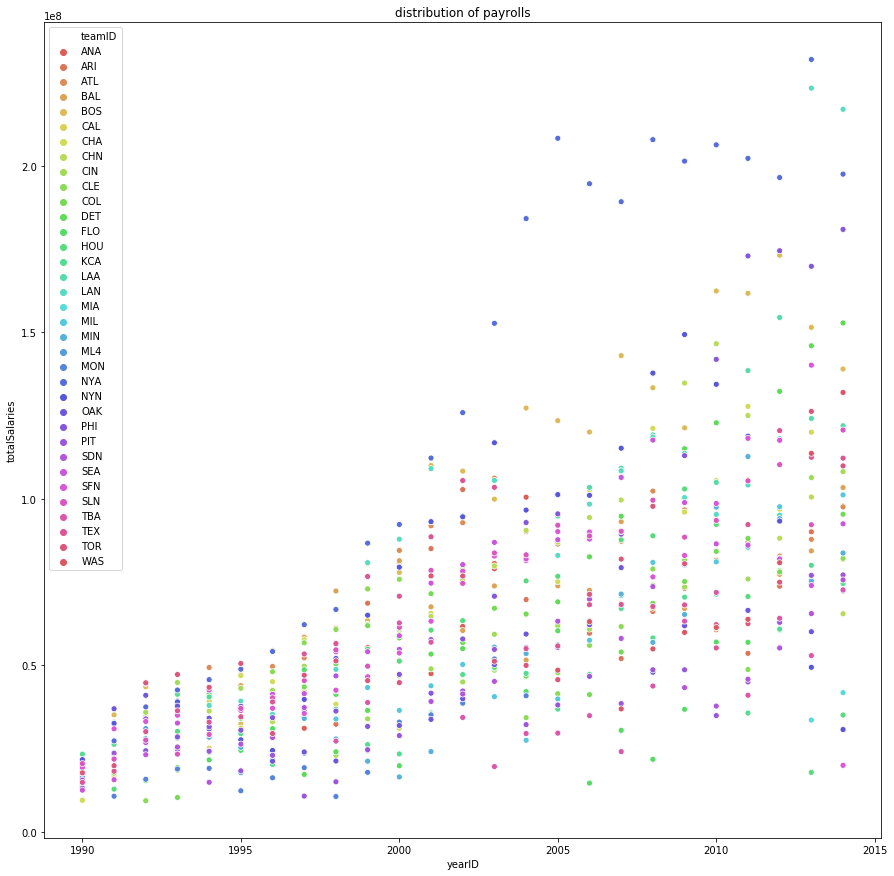

In [25]:
#distribution of payrolls from 1990 To 2014
#sns.color_palette("RdBu", 10)
plt.figure(figsize=(15, 15))
distribution_plot = sns.scatterplot(x="yearID",
                         y="totalSalaries",
                         hue='teamID',
                         data=team_df,
                         palette="hls"
                         ).set_title('distribution of payrolls')
plt.show()

explain the previous plot:
------
This plot to show the distribution of payrolls (total salaries)
for all the years from 1990 to 2014 showing each team with a different colour. 
So as it’s obvious there is increasing in the payrolls over time. 
Central tendency(mean, median, mode) increasing as well.
OAK:Oakland team(in purple) clearly spent less payrolls then the other teams.



Part 2 | Question 2
-----------------------------------------------

In [28]:
#cut all the years into 5 time periods
lis=[1,2,3,4,5]
team_df['timePeriods'] = pd.cut(team_df['yearID'],bins=[1990,1995,2000,2005,2010,2015],labels=lis)
team_df

,teamID,yearID,totalSalaries,wins,games,winningPercantage,timePeriods
0,ANA,1997,31135472.0,84,162,51.851852,2
1,ANA,1998,41281000.0,85,162,52.469136,2
2,ANA,1999,55388166.0,70,162,43.209877,2
3,ANA,2000,51464167.0,82,162,50.617284,2
4,ANA,2001,47535167.0,75,162,46.296296,3
...,...,...,...,...,...,...,...
853,WAS,2010,61400000.0,69,162,42.592593,4
854,WAS,2011,63856928.0,80,161,49.689441,5
855,WAS,2012,80855143.0,98,162,60.493827,5
856,WAS,2013,113703270.0,86,162,53.086420,5


In [29]:
#getting the mean for totalSalaries and winningPercantage for each period
pDF=team_df.groupby(['teamID','timePeriods']).mean()[['totalSalaries','winningPercantage']]

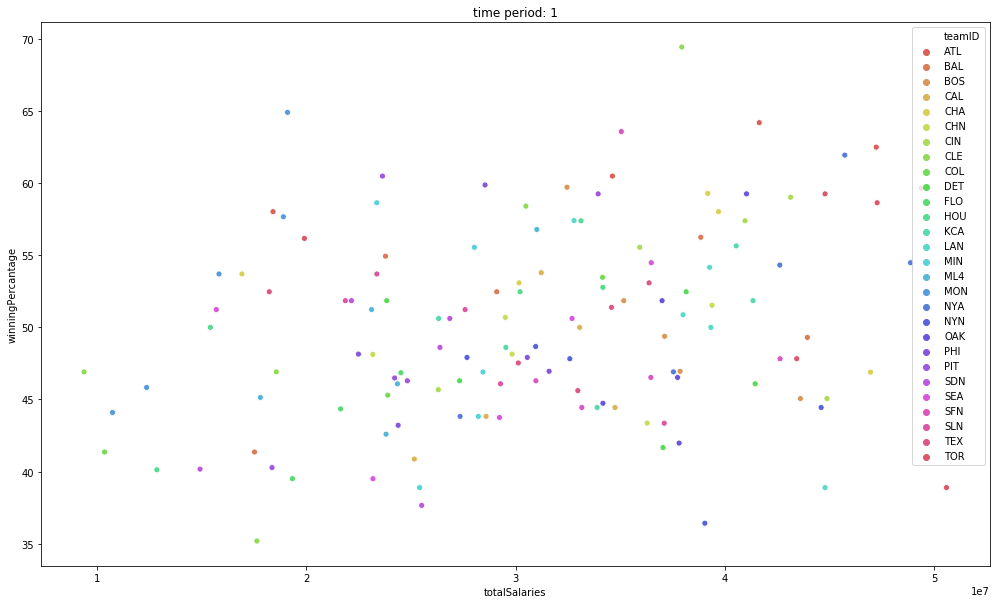

In [30]:
#plots for time periods [5] 
plt.figure(figsize=(17, 10))
periods_plot = sns.scatterplot(x="totalSalaries",
                         y="winningPercantage",
                         hue='teamID',
                         data=team_df[team_df['timePeriods']==1],
                         palette="hls"
                         ).set_title('time period: 1')
plt.show()

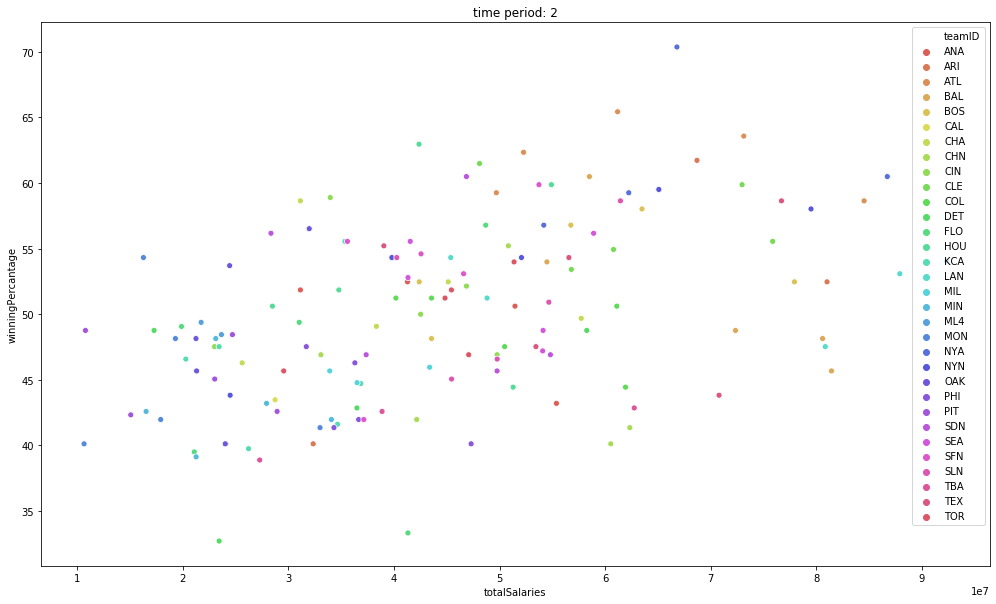

In [110]:
plt.figure(figsize=(17, 10))

periods_plot = sns.scatterplot(x="totalSalaries",
                         y="winningPercantage",
                         hue='teamID',
                         data=team_df[team_df['timePeriods']==2],
                         palette="hls"
                         ).set_title('time period: 2')
plt.show()

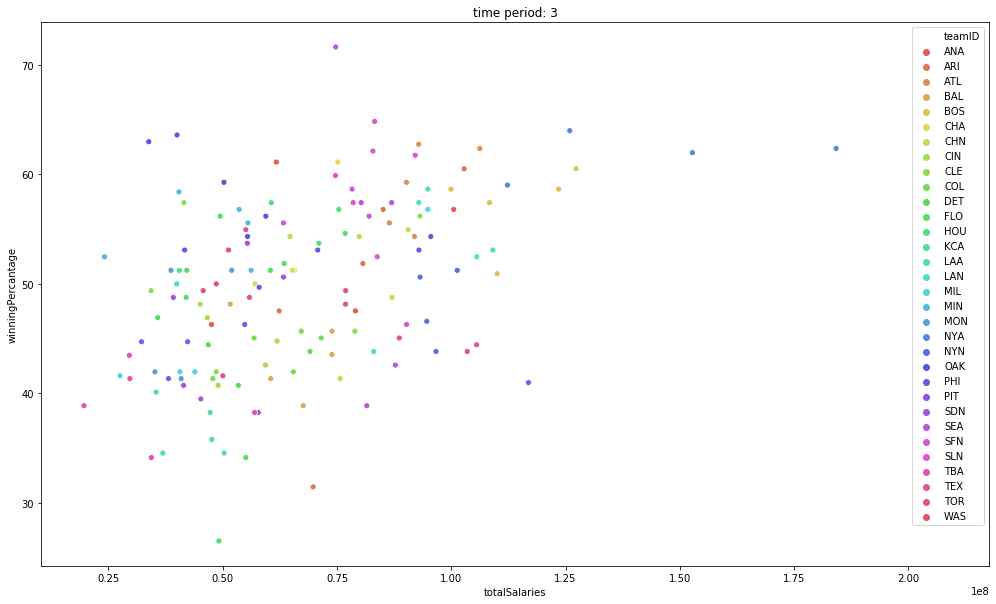

In [111]:
plt.figure(figsize=(17, 10))
periods_plot = sns.scatterplot(x="totalSalaries",
                         y="winningPercantage",
                         hue='teamID',
                         data=team_df[team_df['timePeriods']==3],
                         palette="hls"
                         ).set_title('time period: 3')
plt.show()

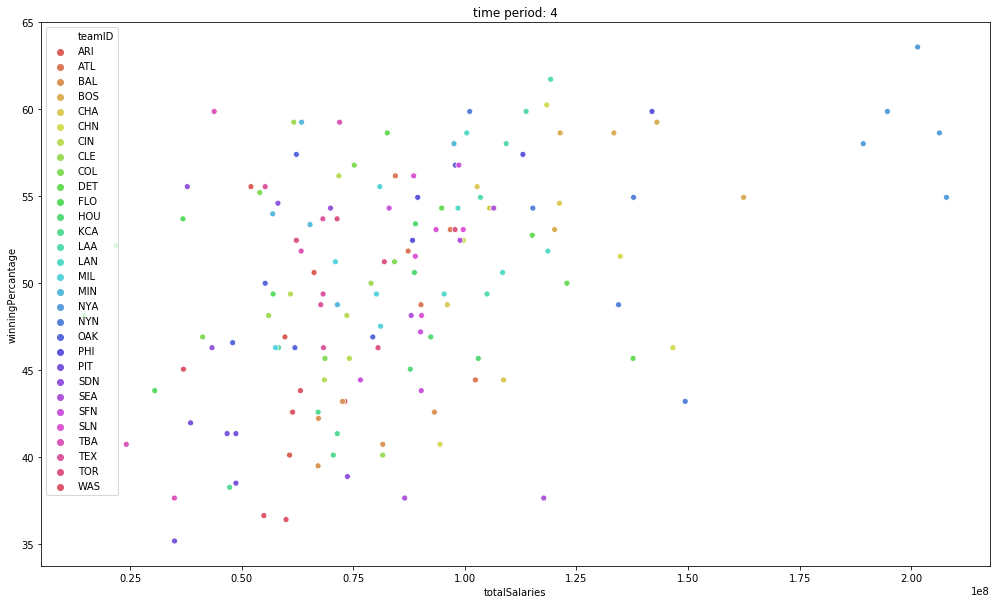

In [112]:
plt.figure(figsize=(17, 10))
periods_plot = sns.scatterplot(x="totalSalaries",
                         y="winningPercantage",
                         hue='teamID',
                         data=team_df[team_df['timePeriods']==4],
                         palette="hls"
                         ).set_title('time period: 4')
plt.show()

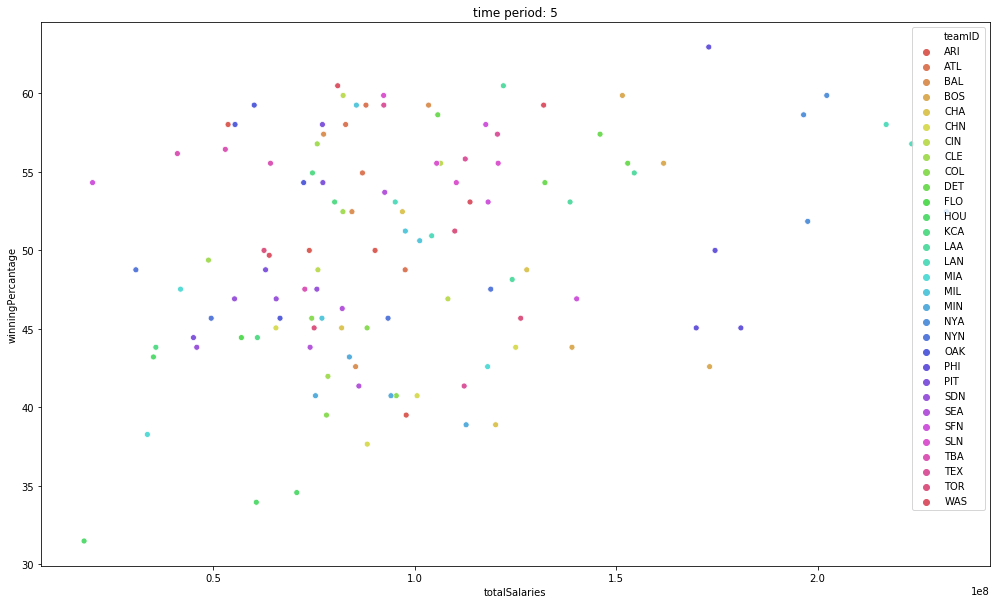

In [113]:
plt.figure(figsize=(17, 10))
periods_plot = sns.scatterplot(x="totalSalaries",
                         y="winningPercantage",
                         hue='teamID',
                         data=team_df[team_df['timePeriods']==5],
                         palette="hls"
                         ).set_title('time period: 5')
plt.show()

explain the previous plots:
------
Period 1: from looking to the plot we can say that the increase of the winning percentage is a result of increasing the payrolls.
  
Period 2: teams like NYA(with blue) and ATL(with orange) are an example for higher payrolls get the higher winning percentage.

Period 3: we can see all the teams tended to decrease the payrolls.

Period 4: Now we can say that the increase in the winning percentage does not have to be a result of increasing the payrolls.


Period 5: Oakland team(in purple-blue) spent the least payrolls and has the highest winning percentage, it means than the OAK efficiently use the money.


Part 3 | Question 1
-----------------------------------------------

In [115]:
#geting the mean and the std for totalSalaries
mean_li = []
years = team_df.groupby(['yearID'])['yearID'].mean().values
salary_mean = team_df.groupby(['yearID']).mean().totalSalaries.values
salary_std = team_df.groupby(['yearID']).std().totalSalaries.values

salary_sum = team_df.groupby(['yearID']).sum().totalSalaries.values
win_sum = team_df.groupby(['yearID']).sum().winningPercantage.values

for i in range(len(years)):
    mean_li.append([years[i],salary_mean[i],salary_std[i]])



In [116]:
#get the stv as a list

l = [i for i in range(25)]
stv = []
for i in l:
    stv.append(salary_sum[i] - salary_mean[i] / salary_std[i])


In [117]:
#transfer the lists to DF
pd_arr = pd.DataFrame(data=mean_li,columns=['yearID','mean','std'])

team_df = team_df.merge(pd_arr, left_on='yearID', right_on='yearID', how='outer')
team_df


,teamID,yearID,totalSalaries,wins,games,winningPercantage,timePeriods,mean,std
0,ANA,1997,31135472.0,84,162,51.851852,2,4.026021e+07,1.306073e+07
1,ATL,1997,52278500.0,101,162,62.345679,2,4.026021e+07,1.306073e+07
2,BAL,1997,58516400.0,98,162,60.493827,2,4.026021e+07,1.306073e+07
3,BOS,1997,43558750.0,78,162,48.148148,2,4.026021e+07,1.306073e+07
4,CHA,1997,57740000.0,80,161,49.689441,2,4.026021e+07,1.306073e+07
...,...,...,...,...,...,...,...,...,...
723,SEA,1996,41328501.0,85,161,52.795031,2,3.417798e+07,1.068853e+07
724,SFN,1996,37144725.0,68,162,41.975309,2,3.417798e+07,1.068853e+07
725,SLN,1996,40269667.0,88,162,54.320988,2,3.417798e+07,1.068853e+07
726,TEX,1996,39041528.0,90,163,55.214724,2,3.417798e+07,1.068853e+07


In [118]:
#calculate the std_pay_roll
team_df['std_pay_roll'] = (team_df['totalSalaries'] - team_df['mean'])/team_df['std']
team_df

,teamID,yearID,totalSalaries,wins,games,winningPercantage,timePeriods,mean,std,std_pay_roll
0,ANA,1997,31135472.0,84,162,51.851852,2,4.026021e+07,1.306073e+07,-0.698639
1,ATL,1997,52278500.0,101,162,62.345679,2,4.026021e+07,1.306073e+07,0.920185
2,BAL,1997,58516400.0,98,162,60.493827,2,4.026021e+07,1.306073e+07,1.397793
3,BOS,1997,43558750.0,78,162,48.148148,2,4.026021e+07,1.306073e+07,0.252554
4,CHA,1997,57740000.0,80,161,49.689441,2,4.026021e+07,1.306073e+07,1.338347
...,...,...,...,...,...,...,...,...,...,...
723,SEA,1996,41328501.0,85,161,52.795031,2,3.417798e+07,1.068853e+07,0.668989
724,SFN,1996,37144725.0,68,162,41.975309,2,3.417798e+07,1.068853e+07,0.277563
725,SLN,1996,40269667.0,88,162,54.320988,2,3.417798e+07,1.068853e+07,0.569927
726,TEX,1996,39041528.0,90,163,55.214724,2,3.417798e+07,1.068853e+07,0.455024


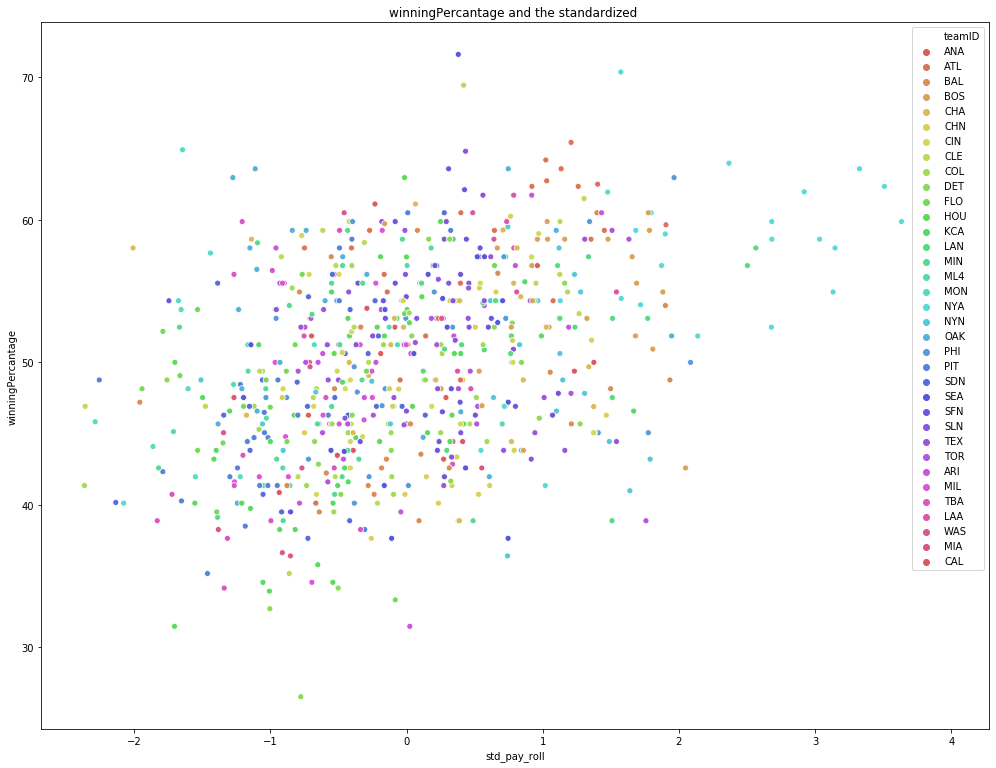

In [119]:
#scatter plot for the winning percentage (y-axis) versus the transformed (standardized)

plt.figure(figsize=(17, 13))
exp_plot = sns.scatterplot(x="std_pay_roll",
                         y="winningPercantage",
                         hue='teamID',
                         data=team_df,
                         palette="hls"
                         ).set_title('winningPercantage and the standardized ')
plt.show()

explain the previous plot:
-------
the plot after standardized the payrolls shows the data is in the range of the mean.
Standardized values are useful for tracking data. scores above the mean have positive standard scores,
while those below the mean have negative standard scores.


Part 3 | Question 2
-----------------------------------------------

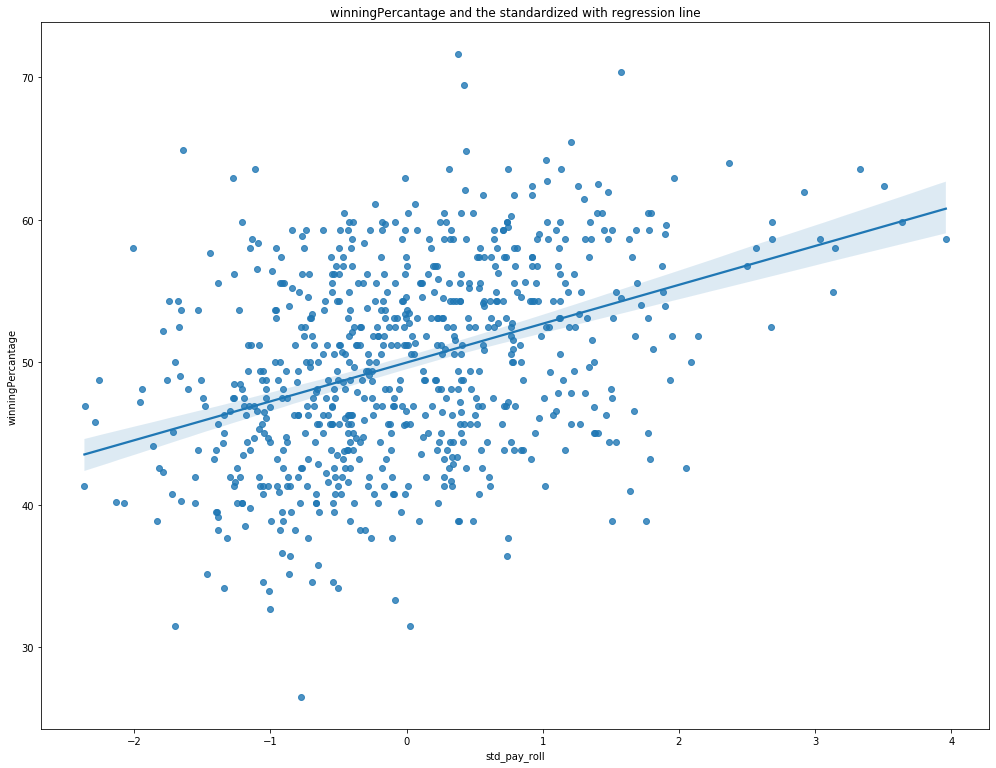

In [121]:
#plot for the winning percentage (y-axis) versus the transformed (standardized) with regression line

plt.figure(figsize=(17, 13))
exp_plot = sns.regplot(x="std_pay_roll",
                         y="winningPercantage",
                         data=team_df,
                    
                         ).set_title('winningPercantage and the standardized with regression line')
plt.show()

In [123]:
#find the expected winningPercantage
team_df['winExpected'] = 50 + 2.5*team_df['std_pay_roll']
team_df

,teamID,yearID,totalSalaries,wins,games,winningPercantage,timePeriods,mean,std,std_pay_roll,winExpected
0,ANA,1997,31135472.0,84,162,51.851852,2,4.026021e+07,1.306073e+07,-0.698639,48.253402
1,ATL,1997,52278500.0,101,162,62.345679,2,4.026021e+07,1.306073e+07,0.920185,52.300463
2,BAL,1997,58516400.0,98,162,60.493827,2,4.026021e+07,1.306073e+07,1.397793,53.494482
3,BOS,1997,43558750.0,78,162,48.148148,2,4.026021e+07,1.306073e+07,0.252554,50.631385
4,CHA,1997,57740000.0,80,161,49.689441,2,4.026021e+07,1.306073e+07,1.338347,53.345868
...,...,...,...,...,...,...,...,...,...,...,...
723,SEA,1996,41328501.0,85,161,52.795031,2,3.417798e+07,1.068853e+07,0.668989,51.672474
724,SFN,1996,37144725.0,68,162,41.975309,2,3.417798e+07,1.068853e+07,0.277563,50.693907
725,SLN,1996,40269667.0,88,162,54.320988,2,3.417798e+07,1.068853e+07,0.569927,51.424817
726,TEX,1996,39041528.0,90,163,55.214724,2,3.417798e+07,1.068853e+07,0.455024,51.137561



Part 3 | Question 3
-----------------------------------------------

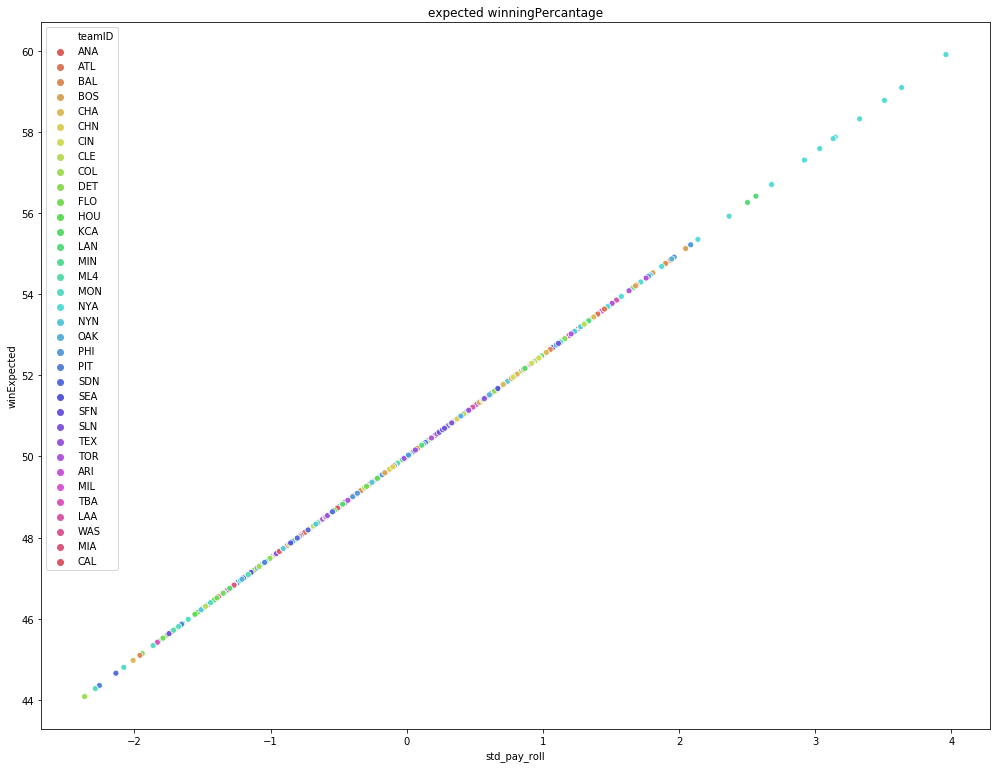

In [124]:
#plot for expected winningPercantage 

plt.figure(figsize=(17, 13))
exp_plot = sns.scatterplot(x="std_pay_roll",
                         y="winExpected",
                         hue='teamID',
                         data=team_df,
                         palette="hls"
                         ).set_title('expected winningPercantage')
plt.show()

In [125]:
#find the efficiency
team_df['efficiency'] = team_df['winningPercantage'] - team_df['winExpected']
team_df

,teamID,yearID,totalSalaries,wins,games,winningPercantage,timePeriods,mean,std,std_pay_roll,winExpected,efficiency
0,ANA,1997,31135472.0,84,162,51.851852,2,4.026021e+07,1.306073e+07,-0.698639,48.253402,3.598450
1,ATL,1997,52278500.0,101,162,62.345679,2,4.026021e+07,1.306073e+07,0.920185,52.300463,10.045216
2,BAL,1997,58516400.0,98,162,60.493827,2,4.026021e+07,1.306073e+07,1.397793,53.494482,6.999346
3,BOS,1997,43558750.0,78,162,48.148148,2,4.026021e+07,1.306073e+07,0.252554,50.631385,-2.483237
4,CHA,1997,57740000.0,80,161,49.689441,2,4.026021e+07,1.306073e+07,1.338347,53.345868,-3.656427
...,...,...,...,...,...,...,...,...,...,...,...,...
723,SEA,1996,41328501.0,85,161,52.795031,2,3.417798e+07,1.068853e+07,0.668989,51.672474,1.122557
724,SFN,1996,37144725.0,68,162,41.975309,2,3.417798e+07,1.068853e+07,0.277563,50.693907,-8.718599
725,SLN,1996,40269667.0,88,162,54.320988,2,3.417798e+07,1.068853e+07,0.569927,51.424817,2.896170
726,TEX,1996,39041528.0,90,163,55.214724,2,3.417798e+07,1.068853e+07,0.455024,51.137561,4.077163


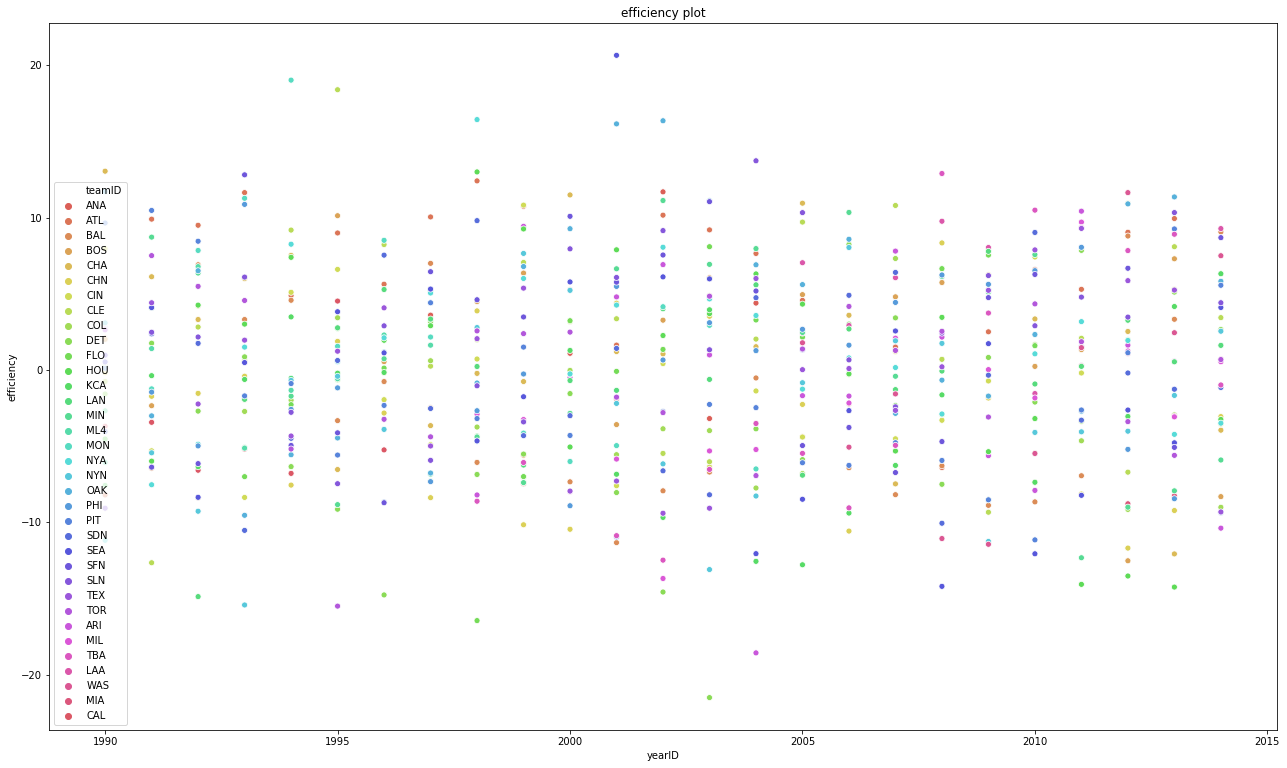

In [126]:
#plot for the efficiency
plt.figure(figsize=(22, 13))
eff_plot = sns.scatterplot(x="yearID",
                         y="efficiency",
                         hue='teamID',
                         data=team_df,
                         palette="hls"
                         ).set_title('efficiency plot')
plt.show()

Answer:“How good was Oakland's efficiency during the Moneyball period?”
---------
The plot shows that the OAK had the highest efficiency starting
from the money ball period that started at 2002, Oakland Athletics 
general manager Billy Beane with the economics expert  Peter Brand
they have managed the team with a very low budget and lead it to
an unexpected win in 2002 American League.
OAK is in the top of the teams in 2002 (coloured by baby blue).  